In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

data = pd.read_csv('/content/displacement_data.csv')
dfx= data[["x","y","u_x"]]
dfy= data[["x","y","u_y"]]



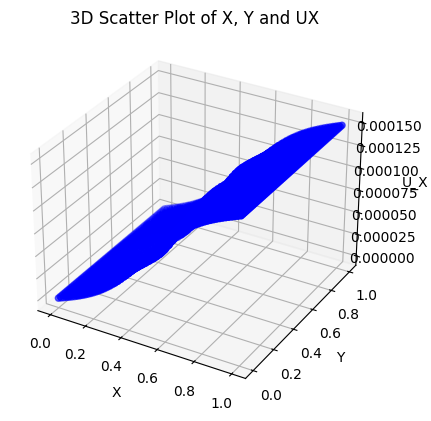

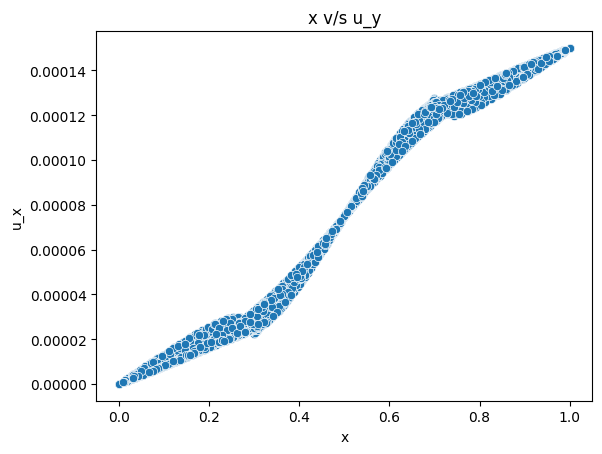

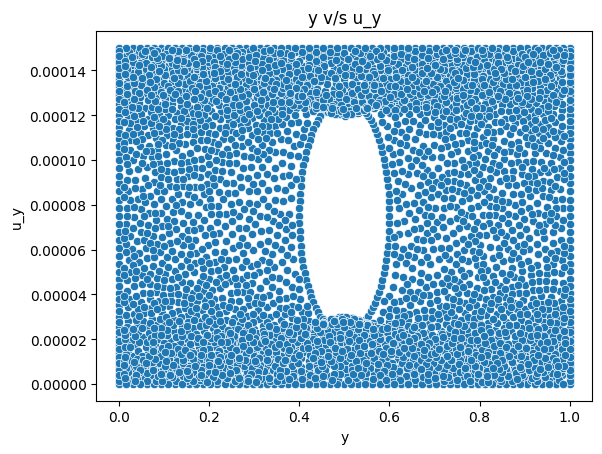

In [2]:
x1 = dfx[['x', 'y']]
y1 = dfx['u_x']
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dfx['x'], dfx['y'], dfx['u_x'], c='b', marker='o')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('U_X')
plt.title("3D Scatter Plot of X, Y and UX")
plt.show()

sns.scatterplot(x="x",y="u_x",data=dfx)
plt.title("x v/s u_y")
plt.xlabel("x")
plt.ylabel("u_x")
plt.show()

sns.scatterplot(x="y",y="u_x",data=dfx)
plt.title("y v/s u_y")
plt.xlabel("y")
plt.ylabel("u_y")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


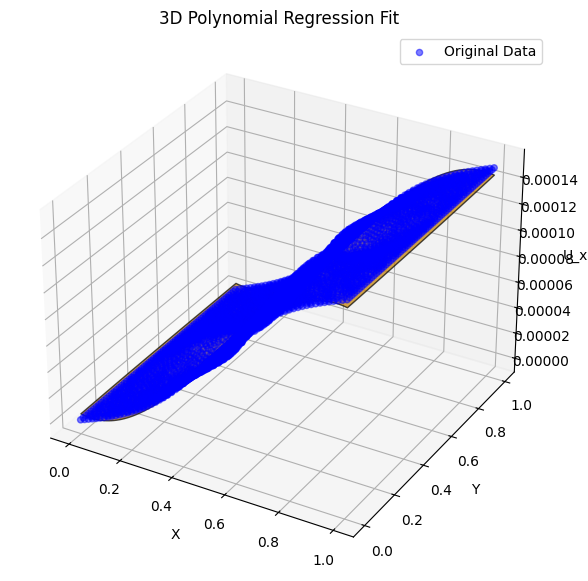

Mean Squared Error: 1.5734678310563587e-11


In [3]:
degree = 3
poly = PolynomialFeatures(degree)
X_poly = poly.fit_transform(x1)
model_x = LinearRegression()
model_x.fit(X_poly,y1)
x_range = np.linspace(dfx['x'].min(), dfx['x'].max(), 100)
y_range = np.linspace(dfx['y'].min(), dfx['y'].max(), 100)
X_grid, Y_grid = np.meshgrid(x_range, y_range)
X_grid_poly = poly.transform(np.c_[X_grid.ravel(), Y_grid.ravel()])
Z_grid = model_x.predict(X_grid_poly).reshape(X_grid.shape)

# Plot the original data and the polynomial plane
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the original scatter data
ax.scatter(dfx['x'], dfx['y'], dfx['u_x'], color='blue', alpha=0.5, label="Original Data")

# Plot the polynomial plane
ax.plot_surface(X_grid, Y_grid, Z_grid, color='orange', alpha=0.7, rstride=100, cstride=100, edgecolor='k')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('U_x')
ax.set_title('3D Polynomial Regression Fit')

plt.legend()
plt.show()
u_x_pred = model_x.predict(X_poly)
print("Mean Squared Error:", mean_squared_error(y1, u_x_pred))

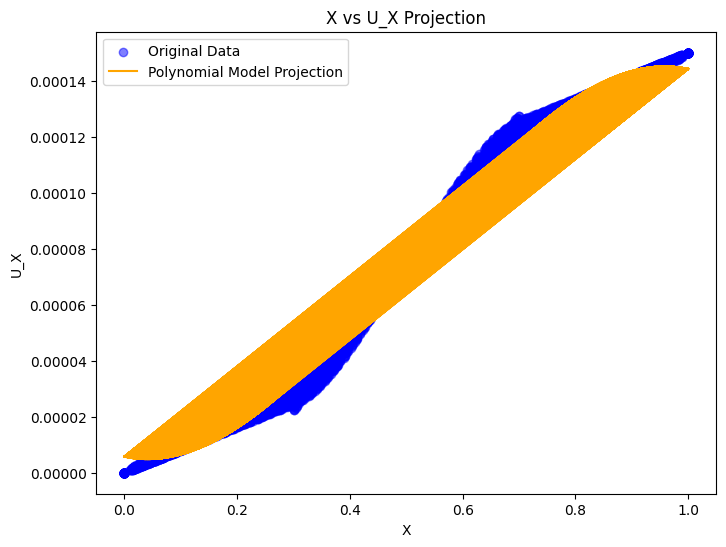

In [4]:
# Define a fixed value for y (e.g., the mean of y)
y_fixed = np.full_like(dfx['x'], dfx['y'].mean())

# Create a DataFrame with varying x and fixed y
X_x_projection = pd.DataFrame({'x': dfx['x'], 'y': y_fixed})
X_x_projection_poly = poly.transform(X_x_projection)  # Transform for polynomial terms

# Predict u_y along x-axis using the fixed y value
u_y_x_projection = model_x.predict(X_x_projection_poly)

# Plot the original data projection along the x-axis
plt.figure(figsize=(8, 6))
plt.scatter(dfx['x'], dfx['u_x'], color='blue', alpha=0.5, label='Original Data')
plt.plot(dfx['x'], u_y_x_projection, color='orange', label='Polynomial Model Projection')
plt.xlabel('X')
plt.ylabel('U_X')
plt.title('X vs U_X Projection')
plt.legend()
plt.show()

In [5]:
# Extract terms and construct the polynomial equation string
coefficients_x = model_x.coef_
print(coefficients_x)
intercept_x = model_x.intercept_
print(intercept_x)
terms = poly.get_feature_names_out(['x', 'y'])
equation = f"{intercept_x} "  # Start with the intercept

for coef, term in zip(coefficients_x[1:], terms[1:]):  # Skip the first term as it corresponds to the intercept
    equation += f"+ ({coef}) * {term} "

print("Polynomial Regression Equation for u_x:")
print(equation)

[ 0.00000000e+00 -4.10930529e-05  2.71555476e-06  5.43177260e-04
 -5.30119780e-06 -3.18337674e-06 -3.62468265e-04  9.73033874e-07
  4.18541540e-06  8.55130462e-07]
5.076324561642661e-06
Polynomial Regression Equation for u_x:
5.076324561642661e-06 + (-4.10930529312741e-05) * x + (2.715554764214252e-06) * y + (0.0005431772603540602) * x^2 + (-5.301197800615734e-06) * x y + (-3.1833767428615604e-06) * y^2 + (-0.0003624682646365158) * x^3 + (9.730338736160329e-07) * x^2 y + (4.185415400370459e-06) * x y^2 + (8.551304617938468e-07) * y^3 


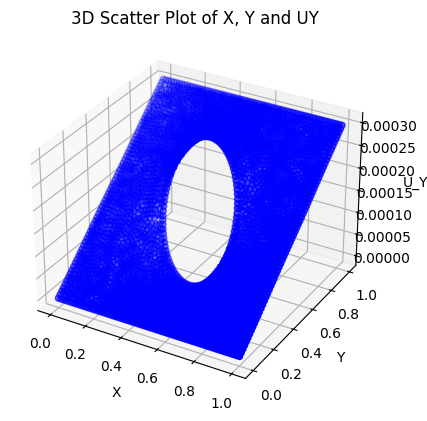

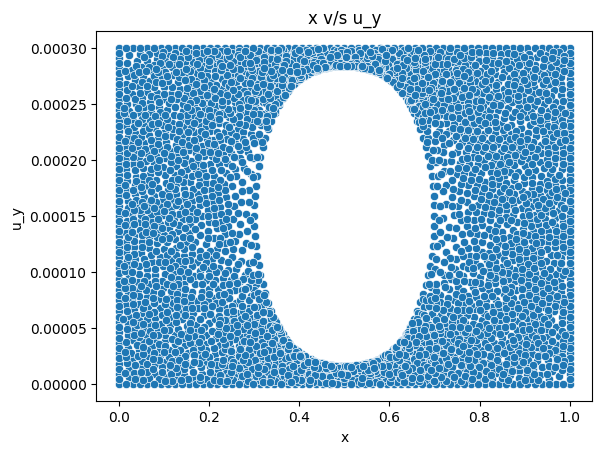

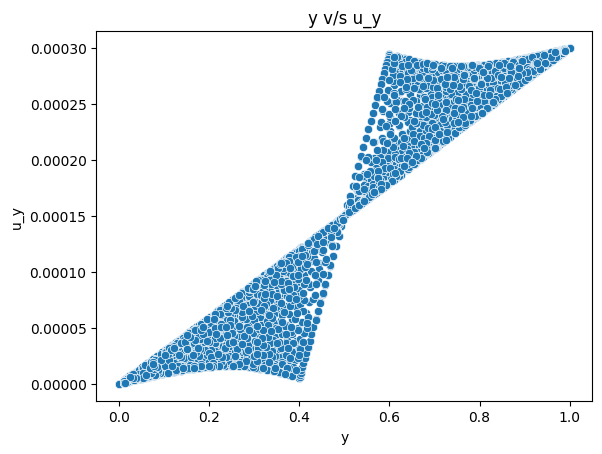

In [6]:
x2 = dfy[['x', 'y']]
y2 = dfy['u_y']
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dfy['x'], dfy['y'], dfy['u_y'], c='b', marker='o')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('U_Y')
plt.title("3D Scatter Plot of X, Y and UY")
plt.show()

sns.scatterplot(x="x",y="u_y",data=dfy)
plt.title("x v/s u_y")
plt.xlabel("x")
plt.ylabel("u_y")
plt.show()

sns.scatterplot(x="y",y="u_y",data=dfy)
plt.title("y v/s u_y")
plt.xlabel("y")
plt.ylabel("u_y")
plt.show()

In [7]:
degree = 3
poly = PolynomialFeatures(degree)
X_poly = poly.fit_transform(x2)

# Fit a linear regression model on the transformed features
model_y = LinearRegression()
model_y.fit(X_poly, y2)

# Predict u_y values for original X
u_y_pred = model_y.predict(X_poly)

# Print model coefficients
print("Polynomial Coefficients:", model_y.coef_)
print("Intercept:", model_y.intercept_)
print("Mean Squared Error:", mean_squared_error(y2, u_y_pred))
coefficients_y = model_y.coef_
intercept_y = model_y.intercept_
terms = poly.get_feature_names_out(['x', 'y'])
equation = f"{intercept_y} "  # Start with the intercept

for coef, term in zip(coefficients_y[1:], terms[1:]):  # Skip the first term as it corresponds to the intercept
    equation += f"+ ({coef}) * {term} "

print("Polynomial Regression Equation for u_y:")
print(equation)

Polynomial Coefficients: [ 0.00000000e+00 -2.22218071e-04 -1.63446351e-04  2.21765038e-04
  4.48236038e-04  1.09326858e-03  1.84912107e-06 -4.51913297e-04
  3.77844496e-06 -7.29852443e-04]
Intercept: 4.921208306549077e-05
Mean Squared Error: 4.779210026749736e-10
Polynomial Regression Equation for u_y:
4.921208306549077e-05 + (-0.00022221807105260428) * x + (-0.0001634463510264909) * y + (0.00022176503824989892) * x^2 + (0.0004482360375437844) * x y + (0.0010932685806262852) * y^2 + (1.8491210747382161e-06) * x^3 + (-0.00045191329652406064) * x^2 y + (3.778444963105038e-06) * x y^2 + (-0.0007298524427315194) * y^3 


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


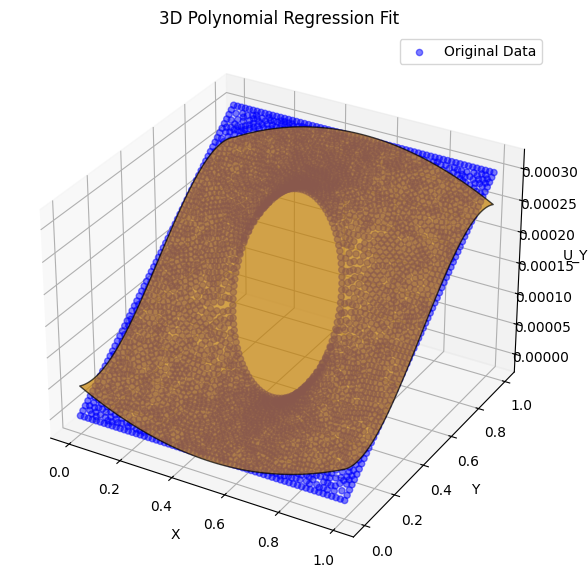

In [8]:
x_range = np.linspace(dfy['x'].min(), dfy['x'].max(), 100)
y_range = np.linspace(dfy['y'].min(), dfy['y'].max(), 100)
X_grid, Y_grid = np.meshgrid(x_range, y_range)
X_grid_poly = poly.transform(np.c_[X_grid.ravel(), Y_grid.ravel()])
Z_grid = model_y.predict(X_grid_poly).reshape(X_grid.shape)

# Plot the original data and the polynomial plane
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the original scatter data
ax.scatter(dfy['x'], dfy['y'], dfy['u_y'], color='blue', alpha=0.5, label="Original Data")

# Plot the polynomial plane
ax.plot_surface(X_grid, Y_grid, Z_grid, color='orange', alpha=0.7, rstride=100, cstride=100, edgecolor='k')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('U_Y')
ax.set_title('3D Polynomial Regression Fit')


plt.legend()
plt.show()

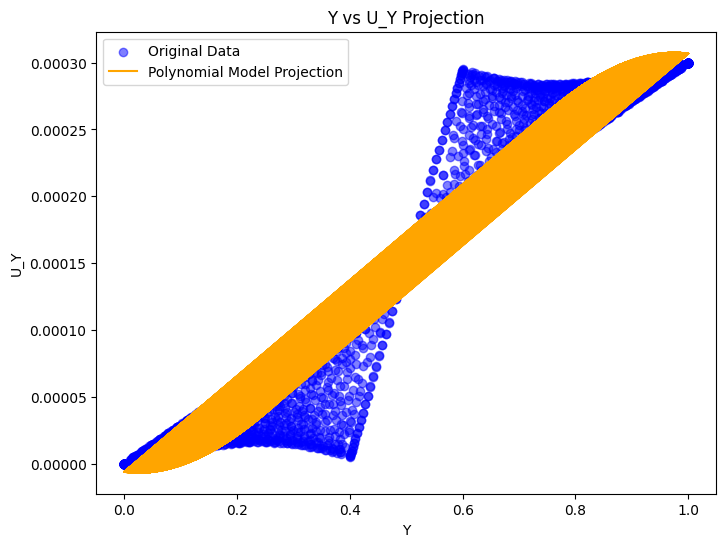

In [9]:
x_fixed = np.full_like(dfy['y'], dfy['x'].mean())

# Create a DataFrame with fixed x and varying y
X_y_projection = pd.DataFrame({'x': x_fixed, 'y': dfy['y']})
X_y_projection_poly = poly.transform(X_y_projection)  # Transform for polynomial terms

# Predict u_y along y-axis using the fixed x value
u_y_y_projection = model_y.predict(X_y_projection_poly)

# Plot the original data projection along the y-axis
plt.figure(figsize=(8, 6))
plt.scatter(dfy['y'], dfy['u_y'], color='blue', alpha=0.5, label='Original Data')
plt.plot(dfy['y'], u_y_y_projection, color='orange', label='Polynomial Model Projection')
plt.xlabel('Y')
plt.ylabel('U_Y')
plt.title('Y vs U_Y Projection')
plt.legend()
plt.show()

In [10]:
from sympy import symbols, diff
x,y = symbols('x y')
ux=(
    intercept_x+
    coefficients_x[1]*x+
    coefficients_x[2]*y+
    coefficients_x[3]*x**2+
    coefficients_x[4]*x*y+
    coefficients_x[5]*y**2+
    coefficients_x[6]*x**3+
    coefficients_x[7]*x**2*y+
    coefficients_x[8]*x*y**2+
    coefficients_x[9]*y**3
)
print(ux)

-0.000362468264636516*x**3 + 9.73033873616033e-7*x**2*y + 0.00054317726035406*x**2 + 4.18541540037046e-6*x*y**2 - 5.30119780061573e-6*x*y - 4.10930529312741e-5*x + 8.55130461793847e-7*y**3 - 3.18337674286156e-6*y**2 + 2.71555476421425e-6*y + 5.07632456164266e-6


In [11]:
uy=(
    intercept_y+
    coefficients_y[1]*x+
    coefficients_y[2]*y+
    coefficients_y[3]*x**2+
    coefficients_y[4]*x*y+
    coefficients_y[5]*y**2+
    coefficients_y[6]*x**3+
    coefficients_y[7]*x**2*y+
    coefficients_y[8]*x*y**2+
    coefficients_y[9]*y**3
)
print(uy)

1.84912107473822e-6*x**3 - 0.000451913296524061*x**2*y + 0.000221765038249899*x**2 + 3.77844496310504e-6*x*y**2 + 0.000448236037543784*x*y - 0.000222218071052604*x - 0.000729852442731519*y**3 + 0.00109326858062629*y**2 - 0.000163446351026491*y + 4.92120830654908e-5


In [25]:
exx_1=diff(ux,x)
eyy_1=diff(uy,y)
exx = sum(term for term in exx_1.as_ordered_terms() if term.has(x, y))
eyy = sum(term for term in eyy_1.as_ordered_terms() if term.has(x, y))
print(exx)
print(eyy)

-0.00108740479390955*x**2 + 1.94606774723207e-6*x*y + 0.00108635452070812*x + 4.18541540037046e-6*y**2 - 5.30119780061573e-6*y
-0.000451913296524061*x**2 + 7.55688992621008e-6*x*y + 0.000448236037543784*x - 0.00218955732819456*y**2 + 0.00218653716125257*y


In [26]:
s_xx_lambda= sum([exx,eyy])
s_yy_lambda= s_xx_lambda
s_xx_mew= 2*exx
s_yy_mew= 2*eyy

print(s_xx_lambda)
print(s_yy_lambda)
print(s_xx_mew)
print(s_yy_mew)

-0.00153931809043361*x**2 + 9.50295767344214e-6*x*y + 0.0015345905582519*x - 0.00218537191279419*y**2 + 0.00218123596345195*y
-0.00153931809043361*x**2 + 9.50295767344214e-6*x*y + 0.0015345905582519*x - 0.00218537191279419*y**2 + 0.00218123596345195*y
-0.00217480958781909*x**2 + 3.89213549446413e-6*x*y + 0.00217270904141624*x + 8.37083080074092e-6*y**2 - 1.06023956012315e-5*y
-0.000903826593048121*x**2 + 1.51137798524202e-5*x*y + 0.000896472075087569*x - 0.00437911465638912*y**2 + 0.00437307432250514*y


In [27]:
R_x_1=s_xx_lambda.subs(x,1)
R_x_2=s_xx_mew.subs(x,1)
print(R_x_1,R_x_2)

-0.00218537191279419*y**2 + 0.0021907389211254*y - 4.72753218170338e-6 8.37083080074092e-6*y**2 - 6.71026010676734e-6*y - 2.10054640285406e-6


In [29]:
from sympy import integrate
R_x_lambda=integrate(R_x_1, (y, 0, 1))
R_x_mew=integrate(R_x_2, (y, 0, 1))
print(R_x_lambda)
print(R_x_mew)

0.000362184624116266
-2.66539952265742e-6


In [30]:
R_y_1=s_yy_lambda.subs(y,1)
R_y_2=s_yy_mew.subs(y,1)
R_y_lambda=integrate(R_y_1, (x, 0, 1))
R_y_mew=integrate(R_y_2, (x, 0, 1))
print(R_y_lambda)
print(R_y_mew)


0.000254804778475904
0.000148477062569978


In [31]:
Reaction = pd.read_csv('/content/reaction_data.csv')
Reaction.head()

,Reaction,Value
0,R3,-6.395837e+07
1,R4,6.395837e+07
2,R1,-7.613148e+07
3,R2,7.613148e+07


In [32]:
R_x=Reaction.iloc[1,1]
R_y=Reaction.iloc[3,1]
C=np.array([R_x,R_y],dtype = float)
print(C)

[63958372.37246344 76131480.53265694]


In [33]:
A=np.array([[R_x_lambda,R_x_mew],[R_y_lambda,R_y_mew]],dtype = float)
print(A)

[[ 3.62184624e-04 -2.66539952e-06]
 [ 2.54804778e-04  1.48477063e-04]]


In [34]:
l= np.linalg.solve(A, C)
print(f"Lame's constants are:- {l}")

Lame's constants are:- [1.78114494e+11 2.07082871e+11]


In [35]:
s_xx= l[0]*s_xx_lambda+(l[1]*s_xx_mew)
s_yy= l[0]*s_yy_lambda+(l[1]*s_yy_mew)
from sympy import lambdify
s_x= lambdify((x,y),s_xx)
s_y = lambdify((x,y),s_yy)
e_x= lambdify((x,y),exx)
e_y = lambdify((x,y),eyy)
data['stress_x'] = np.vectorize(s_x)(data['x'], data['y'])
data['stress_y'] = np.vectorize(s_y)(data['x'], data['y'])
data['e_x'] = np.vectorize(e_x)(data['x'], data['y'])
data['e_y'] = np.vectorize(e_y)(data['x'], data['y'])

data.head()

,x,y,u_x,u_y,stress_x,stress_y,e_x,e_y
0,0.000000,1.000000,0.000000,0.000300,-1.198791e+06,-1.987522e+06,-1.115782e-06,-3.020167e-06
1,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,1.000000,0.000000,0.000150,0.000000,-1.277029e+06,-2.365037e+06,-1.050273e-06,-3.677259e-06
3,1.000000,1.000000,0.000150,0.000300,2.278854e+04,4.698605e+05,-2.199879e-07,8.594640e-07
4,0.699605,0.506279,0.000126,0.000159,2.485154e+08,4.199722e+08,2.268699e-04,6.408510e-04


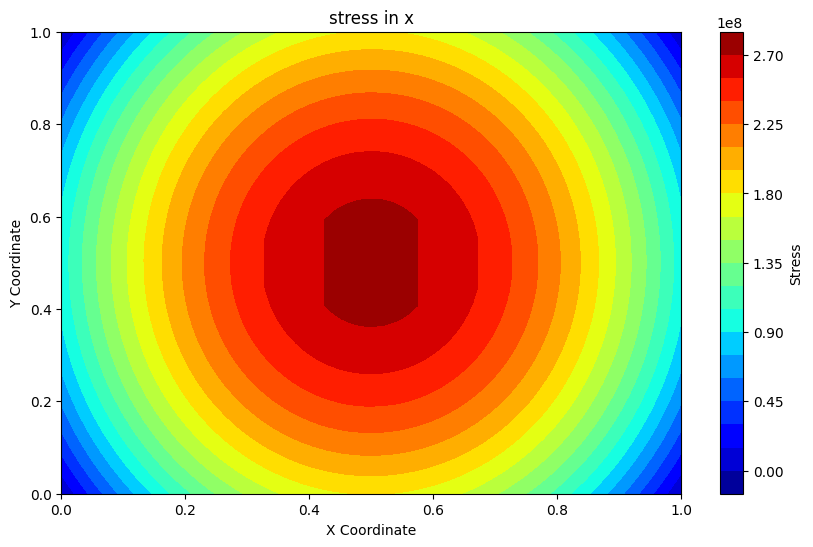

In [36]:
plt.figure(figsize=(10, 6))
contour = plt.tricontourf(data['x'], data['y'], data['stress_x'], levels=20, cmap="jet")

# Step 2: Add a color bar for reference
cbar = plt.colorbar(contour)
cbar.set_label("Stress")

# Optional: Add labels, title, etc.
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.title("stress in x")

plt.show()

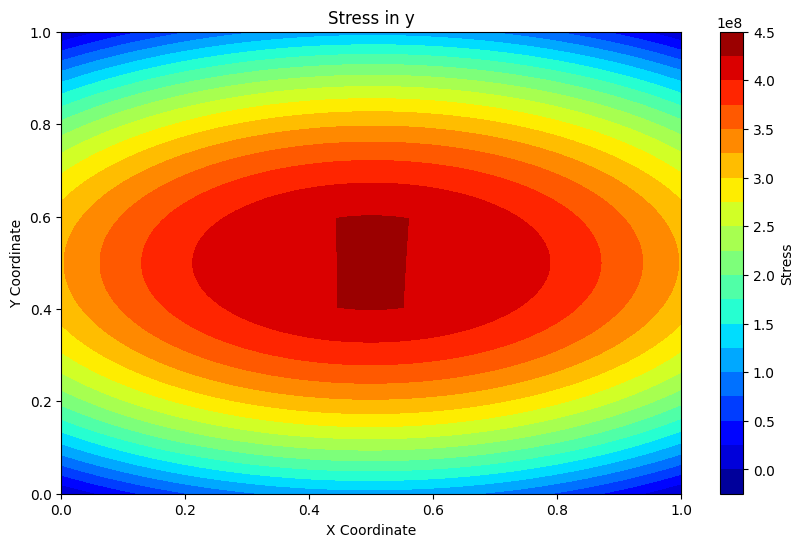

In [37]:
plt.figure(figsize=(10, 6))
contour = plt.tricontourf(data['x'], data['y'], data['stress_y'], levels=20, cmap="jet")

# Step 2: Add a color bar for reference
cbar = plt.colorbar(contour)
cbar.set_label("Stress")

# Optional: Add labels, title, etc.
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.title("Stress in y")

plt.show()

In [38]:
Txy=(l[1])*(diff(ux,y)+diff(uy,x))
T_xy=lambdify((x,y),Txy)
data['Txy'] = np.vectorize(T_xy)(data['x'], data['y'])
data.head()

,x,y,u_x,u_y,stress_x,stress_y,e_x,e_y,Txy
0,0.000000,1.000000,0.000000,0.000300,-1.198791e+06,-1.987522e+06,-1.115782e-06,-3.020167e-06,4.736205e+07
1,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-4.545521e+07
2,1.000000,0.000000,0.000150,0.000000,-1.277029e+06,-2.365037e+06,-1.050273e-06,-3.677259e-06,4.664475e+07
3,1.000000,1.000000,0.000150,0.000300,2.278854e+04,4.698605e+05,-2.199879e-07,8.594640e-07,-4.597154e+07
4,0.699605,0.506279,0.000126,0.000159,2.485154e+08,4.199722e+08,2.268699e-04,6.408510e-04,-3.220308e+05


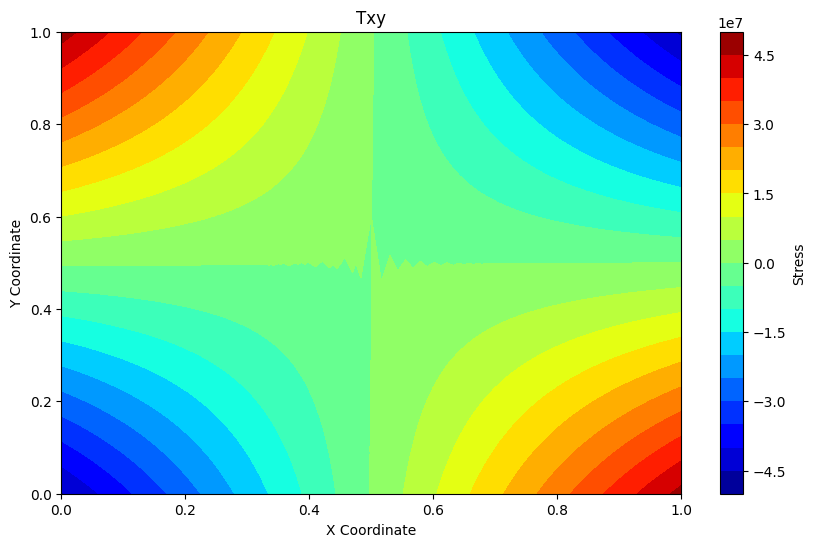

In [39]:
plt.figure(figsize=(10, 6))
contour = plt.tricontourf(data['x'], data['y'], data['Txy'], levels=20, cmap="jet")

# Step 2: Add a color bar for reference
cbar = plt.colorbar(contour)
cbar.set_label("Stress")

# Optional: Add labels, title, etc.
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.title("Txy")

plt.show()